<a href="https://colab.research.google.com/github/ronbalanay/MAT-422/blob/main/MAT422_HW_2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.4.1 MLE for Random Samples

Maximum Likelihood Estimation (MLE) allows us to estimate the parameters of a probability distribution by maximizing a likelihood function.

Enter an integer sample size (n): 1000
Enter the actual mean (μ) of the distribution: 40
PEnter the actual standard deviation (σ) of the distribution: 4

Given a random sample of size 1000 from a normal distribution with actual mean μ = 40.0 and σ = 4.0, we have that:
The Maximum Likelihood Estimate (MLE) for μ (mean) is: 39.94090387771502
MLE for σ^2 (variance) is: 16.534433984016076
MLE for σ (standard deviation) is: 4.066255523699424


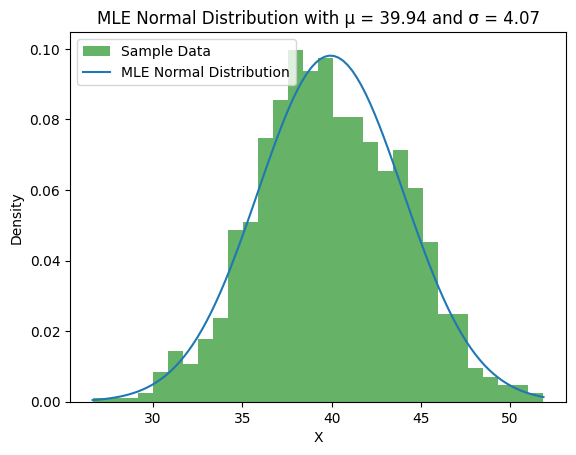

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# we will use these to generate a random sample
n = int(input("Enter an integer sample size (n): "))
mu_actual = float(input("Enter the actual mean (μ) of the distribution: "))
sigma_actual = float(input("PEnter the actual standard deviation (σ) of the distribution: "))

sample = np.random.normal(mu_actual, sigma_actual, n)

# log likelihood for normal distribution
def log_likelihood(mu, sigma, data):
    n = len(data)
    return -n/2 * np.log(2 * np.pi * sigma**2) - np.sum((data - mu)**2) / (2 * sigma**2)

# mle mean for μ is simply the sample mean
def mle_mean(data):
    return np.mean(data)

# variance σ^2
def mle_variance(data, mu):
    return np.sum((data - mu)**2) / len(data)

# calculate mle
mu_mle = mle_mean(sample)
sigma2_mle = mle_variance(sample, mu_mle)

print(f"\nGiven a random sample of size {n} from a normal distribution with actual mean μ = {mu_actual} and σ = {sigma_actual}, we have that:")
print(f"The Maximum Likelihood Estimate (MLE) for μ (mean) is: {mu_mle}")
print(f"MLE for σ^2 (variance) is: {sigma2_mle}")
print(f"MLE for σ (standard deviation) is: {np.sqrt(sigma2_mle)}")

def plot_normal(mu, sigma, sample):
    plt.hist(sample, bins=30, density=True, alpha=0.6, color='g', label="Sample Data")

    x = np.linspace(min(sample), max(sample), 100)
    plt.plot(x, (1 / (np.sqrt(2 * np.pi * sigma**2))) * np.exp(-(x - mu)**2 / (2 * sigma**2)), label="MLE Normal Distribution")

    plt.title(f"MLE Normal Distribution with μ = {mu:.2f} and σ = {sigma:.2f}")
    plt.xlabel("X")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

#plot normal distribution
plot_normal(mu_mle, np.sqrt(sigma2_mle), sample)


# 2.4.2 Linear Regression

Please enter the number of data points (n): 72

Given 72 data points:
Maximum Likelihood Estimate for β0 (intercept): 1.9591816617545497
Maximum Likelihood Estimate for β1 (slope): 2.9865524107602495


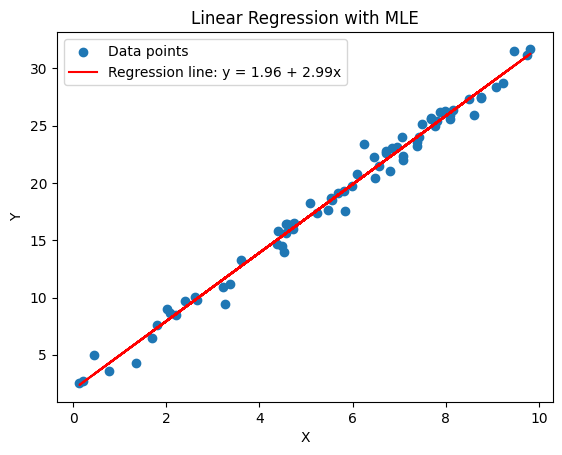

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# we will generate (n) random samples
n = int(input("Please enter the number of data points (n): "))

# generate a random independent variable X (with a bias term) and a dependent variable Y
X = np.random.rand(n, 1) * 10
X = np.c_[np.ones(X.shape[0]), X]  # add bias term
beta_actual = [2, 3]  # y = 2 + 3x
Y = X @ beta_actual + np.random.normal(0, 1, n)  # y = beta0 + beta1*x + noise

# using least squares, we calculate MLE for the beta parameters
def mle_linear_regression(X, Y):
    return np.linalg.inv(X.T @ X) @ X.T @ Y

# mle for beta
beta_mle = mle_linear_regression(X, Y)
beta0_mle, beta1_mle = beta_mle

# predicted Y values given mle for beta
Y_pred = X @ beta_mle

def plot_regression(X, Y, Y_pred, beta0, beta1):
  #remove bias column
    plt.scatter(X[:, 1], Y, label="Data points")
    plt.plot(X[:, 1], Y_pred, color='r', label=f"Regression line: y = {beta0:.2f} + {beta1:.2f}x")
    plt.title("Linear Regression with MLE")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.show()

print(f"\nGiven {n} data points:")
print(f"Maximum Likelihood Estimate for β0 (intercept): {beta0_mle}")
print(f"Maximum Likelihood Estimate for β1 (slope): {beta1_mle}")

plot_regression(X, Y, Y_pred, beta0_mle, beta1_mle)
